In [356]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [357]:
df=pd.read_csv("/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv")

In [358]:
df.shape

(10000, 14)

In [359]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [361]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [362]:
df.duplicated().sum()

0

In [363]:
x=df
y= df.Exited

<Axes: >

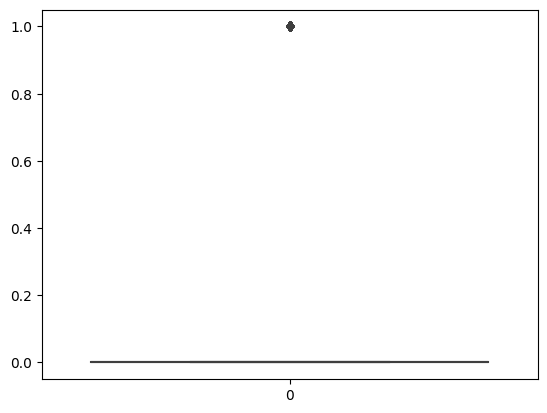

In [364]:
sns.boxplot(y)

In [365]:
label_encode=LabelEncoder()

In [366]:
coloumns_to_encode=['Gender','Geography','Surname']
for i in coloumns_to_encode:
    df[i]=label_encode.fit_transform(df[i])

In [367]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [368]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [369]:
x=df
y=df.Exited

In [370]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=3)

In [371]:
print(x.shape,x_train.shape,x_test.shape)#splitted

(10000, 14) (8000, 14) (2000, 14)


In [372]:
print(df.Exited.std())

0.40276858399484955


In [373]:
scaler=StandardScaler()

In [374]:
scaler.fit(x_train)

StandardScaler()

In [375]:
x_train_standarized=scaler.transform(x_train)

In [376]:
print(x_train_standarized)

[[ 0.10526482 -1.60807066  0.35071097 ...  0.97238125  0.94284216
  -0.50819023]
 [ 1.30880913 -0.97247162  1.27548035 ... -1.02840321 -0.8892186
  -0.50819023]
 [-1.7125021   1.44088884  0.09592757 ... -1.02840321 -1.24375504
   1.96776706]
 ...
 [ 1.68508965 -1.05143521 -1.75950894 ...  0.97238125  1.47215448
   1.96776706]
 [-1.14081855  1.5864479   1.41466758 ...  0.97238125  1.06350441
  -0.50819023]
 [ 0.34839461  0.77010966  0.07941383 ...  0.97238125 -1.2962918
  -0.50819023]]


In [377]:
x_test_standarized=scaler.transform(x_test)
print(x_test_standarized)

[[ 0.30758477 -1.47045956 -0.30276127 ... -1.02840321  1.73904781
  -0.50819023]
 [ 0.54241425 -1.52447773 -1.60144887 ... -1.02840321 -0.10864981
  -0.50819023]
 [-1.22382161 -1.47062688 -0.92556513 ... -1.02840321  1.36085722
   1.96776706]
 ...
 [ 1.1929507  -1.02204174  0.55123494 ... -1.02840321 -0.94461372
  -0.50819023]
 [ 0.45837365 -0.59539015 -0.53041495 ... -1.02840321  1.16907263
  -0.50819023]
 [ 0.76375573  0.24929577  1.01833784 ... -1.02840321 -1.13563063
  -0.50819023]]


In [378]:
print(x_train_standarized.std())
print(x_test_standarized.std())

1.0
0.999033621213798


In [379]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check class distribution before and after SMOTE
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_resampled))


Before SMOTE: [6358 1642]
After SMOTE: [6358 6358]


In [380]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [381]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [382]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [383]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim=14, activation='sigmoid'))  
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [384]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [385]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [386]:
history = model.fit(x_train_standarized,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6569 - loss: 0.5862 - val_accuracy: 0.8050 - val_loss: 0.3678
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.2976 - val_accuracy: 0.9981 - val_loss: 0.0889
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0647 - val_accuracy: 1.0000 - val_loss: 0.0240
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 1.

In [387]:
model.layers[1].get_weights()

[array([[ 0.11017282,  0.2491125 , -0.19737832, ..., -0.00623261,
          0.02512996,  0.11993421],
        [ 0.21705158, -0.5094561 ,  0.11643052, ..., -0.05779304,
         -0.47158048, -0.4440219 ],
        [-0.2560864 ,  0.3381256 , -0.29676786, ...,  0.16616997,
          0.19776563,  0.4076385 ],
        ...,
        [-0.28759843,  0.10993345, -0.36929625, ...,  0.1107263 ,
          0.16695456, -0.01012476],
        [ 0.40511438, -0.32550046,  0.3387624 , ..., -0.26815698,
         -0.16751015, -0.1359767 ],
        [-0.353665  ,  0.3540137 , -0.5297051 , ...,  0.44945994,
          0.038682  ,  0.4690907 ]], dtype=float32),
 array([ 0.11579366, -0.07698032,  0.06773049,  0.03868889,  0.0248278 ,
        -0.03723029, -0.17213653, -0.04307504,  0.01002895, -0.04066747,
         0.05067068, -0.02727671,  0.02639198,  0.0363413 , -0.04412711,
         0.06397506,  0.00882577, -0.06180305,  0.06421712,  0.06218333,
        -0.07561093, -0.08361229,  0.03873553, -0.03390238,  0.024

In [388]:
y_log=model.predict(x_test_standarized)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [389]:
y_pred=np.where(y_log>0.5,1,0)

In [390]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

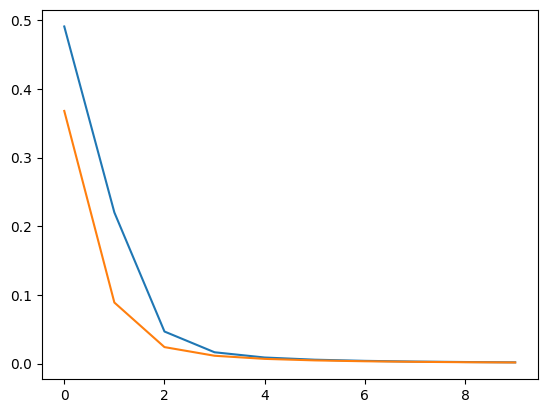

In [391]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

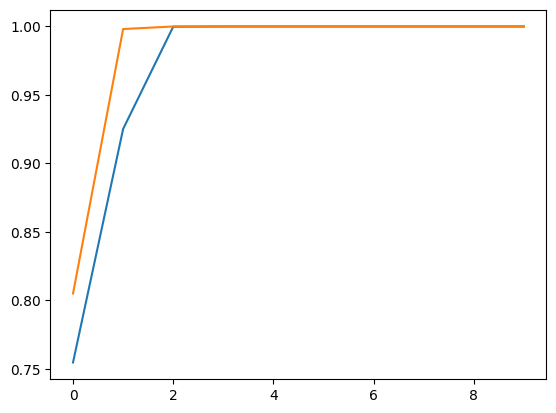

In [392]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])